In [173]:
from numpy import *

#problem 6 & 7

a = np.array([[2, -1, 0, 0],
           [-1, 2, -1, 0],
           [0, -1, 2, -1],
           [0, 0, -1, 2]],float)
b = np.array([0.2, 0.4, 0.6, 0.8], float)
n = len(b)
x = np.zeros(n, float)

#forward elimination
for k in range(n-1):
    for i in range(k+1, n):
        fctr = a[i, k] / a[k, k]
        for j in range(k, n):
            a[i, j] = a[i, j] - fctr*a[k, j]
        b[i] = b[i] - fctr*b[k]
        
#back-subst.
x[n-1] = b[n-1] / a[n-1, n-1]
for i in range(n-2, -1, -1):
  Sum = b[i]
  for j in range(i+1, n):
      Sum = Sum - a[i, j]*x[j]
  x[i] = Sum/a[i, i]
  
print('Results: g vector')
print(x)

# making the tridiagonal matrix
nXn = 10
a = zeros((nXn, nXn), dtype=float)
u = len(a)
for i in range(u):
    for j in range(len(a[i])):
        if i == j:
            a[i][j] = 2
        elif i - j == -1 or i-j == 1:
            a[i][j]=-1
        else:
            a[i][j] = 0

#making the v_i vector with equal stepsize:

b = [0]*len(a)
for i in range(u):
    b[i] = i/(1+len(a)) +1/(len(a)+1)

n=len(a)

print("matrix A", len(a),"x",len(a),"matrix")
print(a)
print("vector v") #steps
print(b)


x = np.zeros(n, float)

#forward elimination
for k in range(n-1):
    for i in range(k+1, n):
        fctr = a[i, k] / a[k, k]
        for j in range(k, n):
            a[i, j] = a[i, j] - fctr*a[k, j]
        b[i] = b[i] - fctr*b[k]
        
#back-subst.
x[n-1] = b[n-1] / a[n-1, n-1]
for i in range(n-2, -1, -1):
  Sum = b[i]
  for j in range(i+1, n):
      Sum = Sum - a[i, j]*x[j]
  x[i] = Sum/a[i, i]
  
print('Results: vector g')
print(x)
v=x

list_v = pd.DataFrame(x, columns=['v'])

Results: g vector
[0.8 1.4 1.6 1.2]
matrix A 10 x 10 matrix
[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]
vector v
[0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.36363636363636365, 0.4545454545454546, 0.5454545454545454, 0.6363636363636364, 0.7272727272727273, 0.8181818181818182, 0.9090909090909092]
Results: vector g
[1.81818182 3.54545455 5.09090909 6.36363636 7.27272727 7.72727273
 7.63636364 6.90909091 5.45454545 3.18181818]


In [187]:
e = 2.71828
x = [0]*10
for i in range(len(x)):
    x[i] = i/(1+len(x)) +1/(len(x)+1)
print(x)
xakse=x
b=[0]*10
for i in range(len(x)):
    b[i] = 1-(1-e**(-10))*x[i]-e**(-10*x[i])
print("exact solution, u(x)")
print(b)

d = [0]*10
for i in range(len(b)):
    d[i] = x[i]-b[i]

print("difference between estimated results and exact results")
print(d)


[0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.36363636363636365, 0.4545454545454546, 0.5454545454545454, 0.6363636363636364, 0.7272727272727273, 0.8181818181818182, 0.9090909090909092]
exact solution, u(x)
[0.5062044684873781, 0.6558692630691476, 0.661887585953049, 0.6100321002781045, 0.5348598030064877, 0.4502933822691254, 0.3619421577937484, 0.2720660715909814, 0.181575632980901, 0.09083767758054886]
difference between estimated results and exact results
[-0.41529537757828716, -0.4740510812509658, -0.38916031322577627, -0.24639573664174086, -0.08031434846103314, 0.09516116318542, 0.27442147856988797, 0.4552066556817459, 0.6366061852009173, 0.8182532315103603]


In [190]:
#problem 7
import pandas as pd
list_x=pd.DataFrame(x)
list_x=pd.DataFrame(x, columns=['x'])
print(list_x)

list_u=pd.DataFrame(b)
list_u=pd.DataFrame(b, columns=['u'])
print(list_u)
print(list_v)

list_dvu=pd.DataFrame(v-b, columns=['difference'])
print(list_dvu)

listTOT = pd.concat([list_x, list_u, list_v, list_dvu], axis = 1)
print(listTOT)

listTOT.to_csv('listeDifference.csv')

          x
0  0.090909
1  0.181818
2  0.272727
3  0.363636
4  0.454545
5  0.545455
6  0.636364
7  0.727273
8  0.818182
9  0.909091
          u
0  0.506204
1  0.655869
2  0.661888
3  0.610032
4  0.534860
5  0.450293
6  0.361942
7  0.272066
8  0.181576
9  0.090838
          v
0  1.818182
1  3.545455
2  5.090909
3  6.363636
4  7.272727
5  7.727273
6  7.636364
7  6.909091
8  5.454545
9  3.181818
   difference
0    1.311977
1    2.889585
2    4.429022
3    5.753604
4    6.737867
5    7.276979
6    7.274421
7    6.637025
8    5.272970
9    3.090981
          x         u         v  difference
0  0.090909  0.506204  1.818182    1.311977
1  0.181818  0.655869  3.545455    2.889585
2  0.272727  0.661888  5.090909    4.429022
3  0.363636  0.610032  6.363636    5.753604
4  0.454545  0.534860  7.272727    6.737867
5  0.545455  0.450293  7.727273    7.276979
6  0.636364  0.361942  7.636364    7.274421
7  0.727273  0.272066  6.909091    6.637025
8  0.818182  0.181576  5.454545    5.272970
9  0.90909

0.271535426420465
[0.271535426420465, 1.0611129909223942, 1.4881786804172032, 1.7498264868445215, 1.907743475708225, 1.9847158509664733, 1.984364288049463, 1.8926637964349124, 1.6625937373316049, 1.1284883558630656]
     logDif
0  0.271535
1  1.061113
2  1.488179
3  1.749826
4  1.907743
5  1.984716
6  1.984364
7  1.892664
8  1.662594
9  1.128488


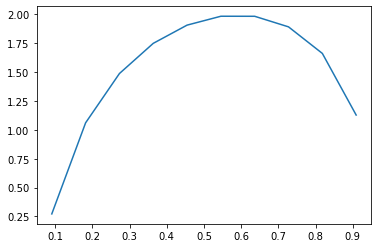

In [233]:
#problem 8:
import matplotlib.pyplot as plt
import math

#a) plotting log(error)

l=[0]*10
diff=v-b

print(math.log(diff[0]))
for i in range (10):
    l[i] = math.log(diff[i])

print(l)

logDif=pd.DataFrame(l, columns=['logDif'])
print(logDif)

plt.plot(list_x.x, logDif.logDif)

plt.savefig('problem8a.pdf')




[0.9523500298169529, 1.4829067949240597, 1.900838227620235, 2.2440701866371358, 2.5334940925907388, 2.7825717990201717, 3.0006351530729707, 3.1943741283580116, 3.368676738770029, 3.527169483978818]


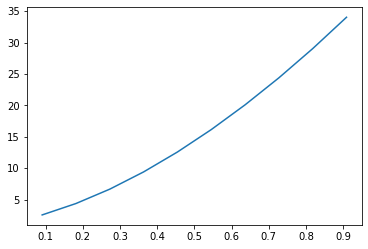

In [234]:
#b) plotting log of relative error

rel = diff/b
logError=[0]*10

for i in range (10):
    logError[i] = math.log(rel[i])
    
print(logError)

relError = pd.DataFrame(rel, columns=['relError'])
plt.plot(list_x.x, relError.relError)

plt.savefig('problem8b.pdf')